<a href="https://colab.research.google.com/github/tarunpanda001/Machine_learning_Models/blob/main/DecisionTrees_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree

In [44]:
## Problem: Employee Churn

In [45]:
## 1. Based on historical data, which Employeem will leave next? (Model: Classification)
## 2. Can you help me idenity factors that is affecting the customers to leave? (Model Interpretibility)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk

Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: /content/HR-Employee-Attrition.csv
100% 228k/228k [00:00<00:00, 106MB/s]


In [48]:
df=pd.read_csv("HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [50]:
df.shape

(1470, 35)

In [51]:
df["Attrition"].value_counts()

,count
Attrition,
No,1233
Yes,237


In [52]:
## Attrition -> yes i.e That employee trying to leave the company

When we tried to implement  Logistic Regression* for our data, it was not suitable because, although the target variable follows a binary class distribution, the data itself is non-linear in nature, making Logistic Regression less effective.

Similarly, using the K-Nearest Neighbors (KNN) algorithm was not ideal, as our dataset contains 35 features, which can lead to the curse of dimensionality, reducing the model’s accuracy and performance.

Therefore, we chose the **Decision Tree algorithm** , which handles non-linear relationships effectively and provides better results for our dataset.

## Preprocessing The Data

In [53]:
# These columns do not provide predictive power
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)

In [54]:
# Encoding Categorical Columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_cols=df.select_dtypes(include="object").columns
for col in cat_cols:
  df[col] = le.fit_transform(df[col])

In [55]:
 # Split Data into Features & Target
 X=df.drop("Attrition",axis=1)
 y=df["Attrition"]

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [58]:
y_train_res.value_counts()

,count
Attrition,
0,978
1,978


## Hyperparameters In decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate

Kfold=KFold(n_splits=10)
depths=[3,4,5,67,9,11,13,15]

for depth in depths:
  model=DecisionTreeClassifier(random_state=7,max_depth=depth)
  cv_acc_res=cross_validate(model,
                            X_train,y_train,
                            cv=Kfold,
                            scoring="accuracy",
                            return_train_score=True)

  print(f"K-Fold for depth:{depth} Accuracy Mean: Train: {cv_acc_res['train_score'].mean()*100} Validation: {cv_acc_res['test_score'].mean()*100}")
  print('***************')

K-Fold for depth:3 Accuracy Mean: Train: 86.23399040718587 Validation: 84.78125452701724
***************
K-Fold for depth:4 Accuracy Mean: Train: 88.27476611491025 Validation: 83.8447052006374
***************
K-Fold for depth:5 Accuracy Mean: Train: 90.09823977037226 Validation: 83.24713892510502
***************
K-Fold for depth:67 Accuracy Mean: Train: 100.0 Validation: 76.61886136462408
***************
K-Fold for depth:9 Accuracy Mean: Train: 97.3734271551255 Validation: 79.67912501810807
***************
K-Fold for depth:11 Accuracy Mean: Train: 99.06465599568733 Validation: 78.8273214544401
***************
K-Fold for depth:13 Accuracy Mean: Train: 99.81103548484411 Validation: 77.97986382732145
***************
K-Fold for depth:15 Accuracy Mean: Train: 99.9622017418437 Validation: 77.296827466319
***************


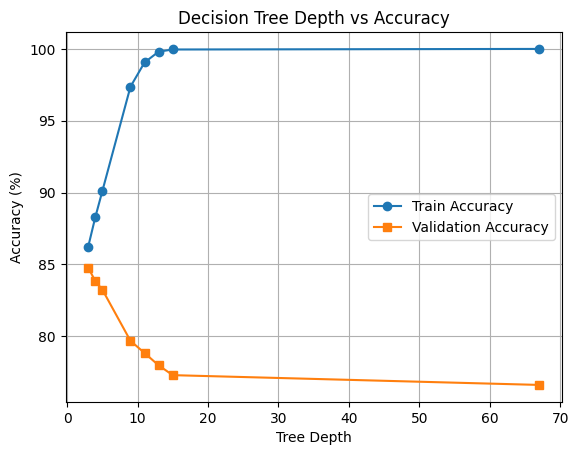

In [60]:
import matplotlib.pyplot as plt

depths = [3, 4, 5, 9, 11, 13, 15, 67]
train_acc = [86.23, 88.27, 90.09, 97.37, 99.06, 99.81, 99.96, 100]
val_acc = [84.78, 83.84, 83.25, 79.68, 78.83, 77.97, 77.29, 76.61]

plt.plot(depths, train_acc, marker='o', label='Train Accuracy')
plt.plot(depths, val_acc, marker='s', label='Validation Accuracy')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy (%)")
plt.title("Decision Tree Depth vs Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [61]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(random_state=7,max_depth=4)
tree_model

DecisionTreeClassifier(max_depth=4, random_state=7)

In [62]:
tree_model.fit(X_train_res,y_train_res)

DecisionTreeClassifier(max_depth=4, random_state=7)

In [63]:
tree_model.score(X_train,y_train)

0.8001700680272109

In [64]:
tree_model.score(X_test,y_test)

0.7925170068027211

In [65]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14),dpi=1200)
plot_tree(tree_model,filled=True,feature_names=X_train.columns)
plt.show()

In [66]:
y_pred=tree_model.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
cm

array([[217,  38],
       [ 23,  16]])

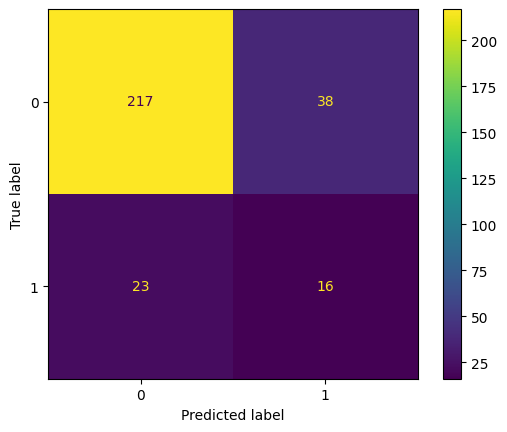

In [68]:
ConfusionMatrixDisplay(cm).plot()

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       255
           1       0.30      0.41      0.34        39

    accuracy                           0.79       294
   macro avg       0.60      0.63      0.61       294
weighted avg       0.82      0.79      0.81       294



## I implemented a Decision Tree classifier which achieved an accuracy of 79%.Now, I’m moving ahead to improve the model’s performance using Bagging — by implementing Random Forests, which combine multiple trees to reduce variance and enhance accuracy!

In [70]:
from sklearn.ensemble import RandomForestClassifier

## Random Forest

In [71]:
params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10]
         }

In [72]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=-1
)

In [43]:
grid.fit(X_train,y_train)
print("Best Params: ",grid.best_params_)
print("Best score: ",grid.best_score_)

Best Params:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 10, 'n_estimators': 100}
Best score:  0.8622466642625316


In [100]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [101]:
model_rf=RandomForestClassifier( bootstrap= True, criterion= 'gini', max_depth= 10, max_features= 10, n_estimators = 100,class_weight='balanced')
model_rf.fit(X_train_res,y_train_res)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=10)

In [102]:
model_rf.score(X_train,y_train)

0.9931972789115646

In [103]:
model_rf.score(X_train,y_train)

0.9931972789115646

In [104]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
y_pred=model_rf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[241,  14],
       [ 26,  13]])

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       255
           1       0.48      0.33      0.39        39

    accuracy                           0.86       294
   macro avg       0.69      0.64      0.66       294
weighted avg       0.85      0.86      0.85       294



In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8639455782312925